In [1]:
# pip install pingouin

In [31]:
import pandas as pd
from sklearn import preprocessing
import pingouin as pg
import numpy as np
from scipy import stats,integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('default')
pd.set_option('display.max_rows', None)
from scipy.stats import linregress

### Data preprocess (Calculating normalized video clip index & plot sentence index)

In [6]:
# Import all (ML&manually extracted) events data from 3 movies
all_500_df = pd.read_csv('AllEvents_500Days.csv')
all_tsn_df = pd.read_csv('AllEvent_TSN.csv')
all_flight_df = pd.read_csv('All_Event_Flight.csv')

In [7]:
# Collect all manually extracted events data
manual_500_df = all_500_df.loc[all_500_df['ExtractionType']=='Manually Extracted Event']
manual_tsn_df = all_tsn_df.loc[all_tsn_df['ExtractionType']=='Manually Extracted Event']
manual_flight_df = all_flight_df.loc[all_flight_df['ExtractionType']=='Manually Extracted Event']

In [8]:
# drop0: remove the annotation sentences which were not alligned with clips in the movie
manual_500_df_drop0 = manual_500_df[manual_500_df['EndTime(s)'] != 0]
manual_tsn_df_drop0 = manual_tsn_df[manual_tsn_df['EndTime(s)'] != 0]
manual_flight_df_drop0 = manual_flight_df[manual_flight_df['EndTime(s)'] != 0]

In [ ]:
# Utilize MinMaxScaler method to get the Normalised Video Clip Index and Plot Sentence Index
scaler = preprocessing.MinMaxScaler()

manual_500_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_500_df_drop0[['StartTime(s)']])
manual_500_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_500_df_drop0[['start_point']])

manual_tsn_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_tsn_df_drop0[['StartTime(s)']])
manual_tsn_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_tsn_df_drop0[['start_point']])

manual_flight_df_drop0['Normalised Video Clip Index'] = scaler.fit_transform(manual_flight_df_drop0[['StartTime(s)']])
manual_flight_df_drop0['Normalised Plot Sentence Index'] = scaler.fit_transform(manual_flight_df_drop0[['start_point']])

In [ ]:
# Save Normalised Video Clip Index and Normalised Plot Sentence Index data
manual_500_df_drop0.to_csv('anno_500_index.csv', index=False)
manual_tsn_df_drop0.to_csv('anno_tsn_index.csv', index=False)
manual_flight_df_drop0.to_csv('anno_flight_index.csv', index=False)

### Plot coverage visualisation(Utilize normalised plot sentence index and video clip index)

#### 500 Days of Summer(2009)

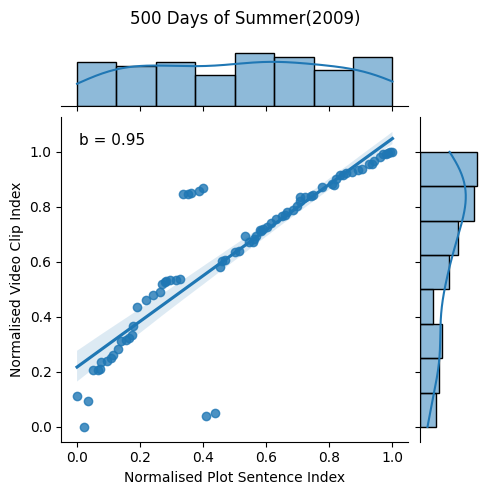

In [32]:
# plot jointplot
# Normalised plot sentence index as x variable and normalised video clip index as y variable
figure_height = 5

plot =sns.jointplot(manual_500_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg',
                    height=figure_height)

plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
plt.suptitle("500 Days of Summer(2009)", fontsize=12)

# b = slope
# plt.text(0.05, 0.95, f'b = {b:.2f}', transform=plot.ax_joint.transAxes, fontsize=11, va='top');

In [16]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data = np.array(manual_500_df_drop0["Normalised Plot Sentence Index"])
y_data = np.array(manual_500_df_drop0["Normalised Video Clip Index"])
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

data = {
    'Slope (b)': [slope],
    'Intercept': [intercept],
    'r-value': [r_value],
    'p-value': [p_value],
    'Standard Error': [std_err]
}
df_rg_500 = pd.DataFrame(data)
print(df_rg_500.to_string(index=False))

 Slope (b)  Intercept  r-value      p-value  Standard Error
  0.830639   0.217911 0.887875 2.431605e-27        0.049373


#### The Social Network(2010)

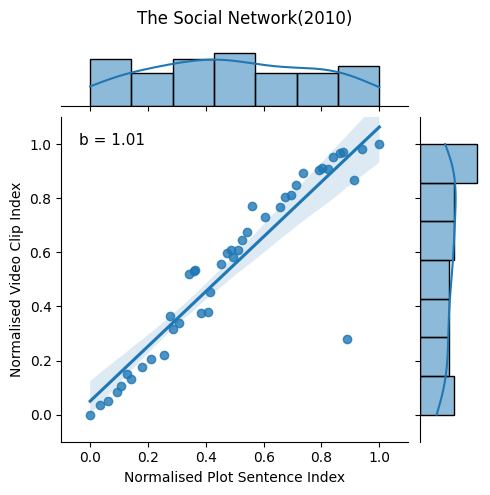

In [34]:
# plot jointplot
# normalised plot sentence index as x variable and normalised video clip index as y variable
figure_height = 5
plot =sns.jointplot(manual_tsn_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg', height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
plt.suptitle("The Social Network(2010)", fontsize=12)

# b = slope
# plt.text(0.05, 0.95, f'b = {b:.2f}', transform=plot.ax_joint.transAxes, fontsize=11, va='top');

In [33]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data = np.array(manual_tsn_df_drop0["Normalised Plot Sentence Index"])
y_data = np.array(manual_tsn_df_drop0["Normalised Video Clip Index"])
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

data = {
    'Slope (b)': [slope],
    'Intercept': [intercept],
    'r-value': [r_value],
    'p-value': [p_value],
    'Standard Error': [std_err]
}
df_rg_tsn = pd.DataFrame(data)
print(df_rg_tsn.to_string(index=False))

 Slope (b)  Intercept  r-value      p-value  Standard Error
  1.013387   0.050093  0.91758 5.052948e-18         0.06857


#### Flight(2012)


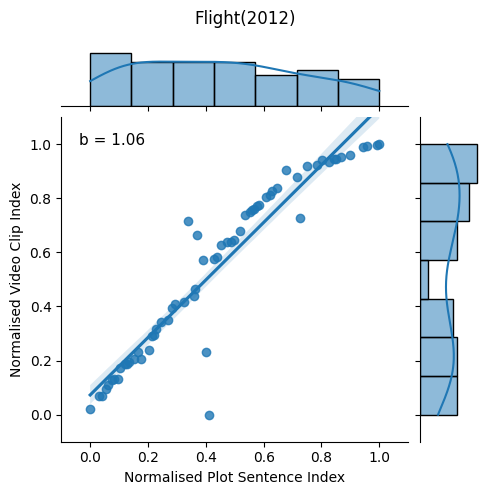

In [36]:
# plot jointplot
# normalised plot sentence index as x variable and normalised video clip index as y variable
figure_height = 5
plot =sns.jointplot(manual_flight_df_drop0, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", kind='reg', height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
plt.suptitle("Flight(2012)", fontsize=12)

b = slope
plt.text(0.05, 0.95, f'b = {b:.2f}', transform=plot.ax_joint.transAxes, fontsize=11, va='top');

In [35]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data = np.array(manual_flight_df_drop0["Normalised Plot Sentence Index"])
y_data = np.array(manual_flight_df_drop0["Normalised Video Clip Index"])
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

data = {
    'Slope (b)': [slope],
    'Intercept': [intercept],
    'r-value': [r_value],
    'p-value': [p_value],
    'Standard Error': [std_err]
}
df_rg_flight = pd.DataFrame(data)
print(df_rg_flight.to_string(index=False))

 Slope (b)  Intercept  r-value      p-value  Standard Error
  1.062921   0.072953   0.9459 1.627310e-31        0.046682


### Cumulative distribution plot(combining data from 3 movies)


In [19]:
# Combine 3 dataframes of 3 movies
df = pd.concat([manual_500_df_drop0, manual_tsn_df_drop0, manual_flight_df_drop0])

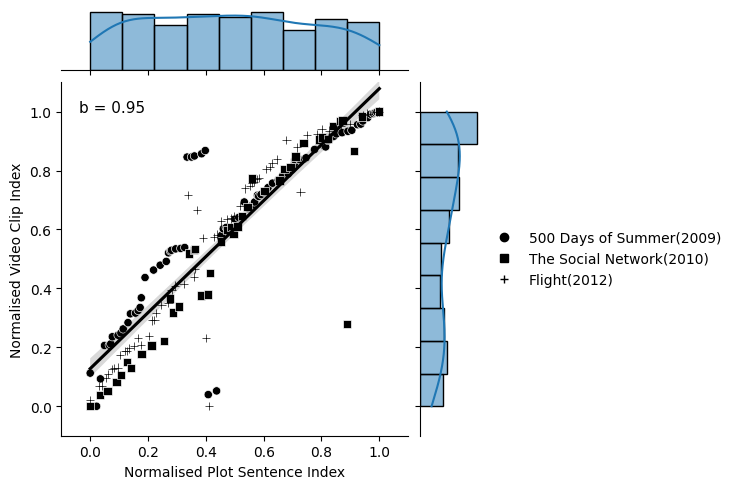

In [29]:
# Set sns default color "black"
custom_palette = ['black']
sns.set_palette(custom_palette)

# Plot cumulative distribution plot
figure_height = 5
g = sns.JointGrid(data=df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", height=figure_height, xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))

markers = ["o", "s", "+"]
legend_labels = df["MovieName"].unique()

# Traverse each movie and draw the corresponding scatterplot
for i, movie_name in enumerate(df["MovieName"].unique()):
    movie_data = df[df["MovieName"] == movie_name]
    sns.scatterplot(data=movie_data, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index",
                    hue="MovieName", ax=g.ax_joint, marker=markers[i])

# Add regression lines for all data
sns.regplot(data=df, x="Normalised Plot Sentence Index", y="Normalised Video Clip Index", scatter=False, color="black", ax=g.ax_joint)

ax = g.ax_joint

# Manually create a legend with the correct symbols
legend_handles = [plt.Line2D([], [], marker=markers[i], linestyle='None', label=label)
                  for i, label in enumerate(legend_labels)]

# Add legend
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False)

# b = slope
# plt.text(0.05, 0.95, f'b = {b:.2f}', transform=g.ax_joint.transAxes, fontsize=11, va='top');

# Plot marginal plot
sns.histplot(data=df, x="Normalised Plot Sentence Index", ax=g.ax_marg_x, color="#1f77b4", kde=True)
sns.histplot(data=df, y="Normalised Video Clip Index", ax=g.ax_marg_y, color="#1f77b4", kde=True, orientation="horizontal")

plt.show()

In [27]:
# Perform linear regression to obtain the slope coefficient (b), intercept, r-value, p-value, and std_err
x_data = np.array(df["Normalised Plot Sentence Index"])
y_data = np.array(df["Normalised Video Clip Index"])
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

data = {
    'Slope (b)': [slope],
    'Intercept': [intercept],
    'r-value': [r_value],
    'p-value': [p_value],
    'Standard Error': [std_err]
}
df_rg_all = pd.DataFrame(data)
print(df_rg_all.to_string(index=False))

 Slope (b)  Intercept  r-value      p-value  Standard Error
   0.95041   0.127619 0.908955 4.539150e-71        0.032312
